## EXERCISE 1

Create the following causal network to verify that the red path is indeed a backdor path using the Causal Graphical Models library

<img src='https://drive.google.com/uc?id=18HUhYGI9Bd2eR87jW_1AdQyCZZBOtBfD'>

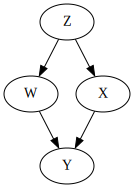

In [9]:
import collections.abc
# causalgraphicalmodels needs the Iterable abstract class from collections, which was removed with Python 3.10
# so we need to get it from collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel

network_1 = CausalGraphicalModel(
    nodes=['X', 'Y', 'W', 'Z'],
    edges=[('X','Y'), ('Z','X'), ('Z','W'), ('W','Y')]
)

network_1.draw()

In [10]:
path = ['X', 'Z', 'W', 'Y']
bp = network_1.get_all_backdoor_paths('X','Y')
print(bp)
if (path in bp): print("(X,Z,W,Y) è un backdoor path")

[['X', 'Z', 'W', 'Y']]
(X,Z,W,Y) è un backdoor path


## EXERCISE 2

Create the following causal network using the Causal Graphical Models library and find out all the possible sets that satisfy the backdoor criterion.

<img src='https://drive.google.com/uc?id=1rY42DmXV7TpRm7rt5N7m78w30VmyvotC'>



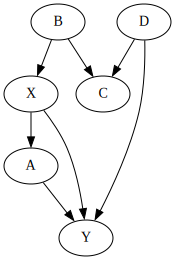

In [11]:
network_2 = CausalGraphicalModel(
    nodes=['A', 'B', 'C', 'D', 'X', 'Y'],
    edges=[('X','A'), ('A','Y'), ('X','Y'), ('B', 'X'), ('B','C'), ('D','C'), ('D','Y')]
)

network_2.draw()

In [12]:
network_2.get_all_backdoor_adjustment_sets('X','Y')

frozenset({frozenset(),
           frozenset({'D'}),
           frozenset({'C', 'D'}),
           frozenset({'B'}),
           frozenset({'B', 'D'}),
           frozenset({'B', 'C'}),
           frozenset({'B', 'C', 'D'})})

## EXERCISE 3

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1Z6YiKMDVKPLFM5luY_pT78ovSpWH-Ibd'>


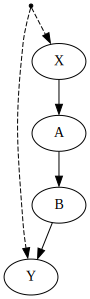

In [13]:
network_3 = CausalGraphicalModel(
    nodes=['A', 'B', 'X', 'Y'],
    edges=[('X','A'), ('A','B'), ('B','Y')],
    latent_edges=[('X','Y')]
)

network_3.draw()

In [14]:
network_3.get_all_frontdoor_adjustment_sets('X','Y')

frozenset({frozenset({'B'}), frozenset({'A'}), frozenset({'A', 'B'})})

## EXERCISE 4

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1lK3HZktVYCsJrDzZYEB0uQhL-DxWACcP'>

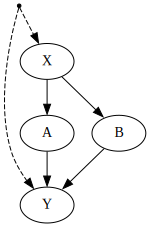

In [15]:
network_4 = CausalGraphicalModel(
    nodes=['A', 'B', 'X', 'Y'],
    edges=[('X','A'), ('A','Y'), ('X','B'), ('B','Y')],
    latent_edges=[('X','Y')]
)

network_4.draw()

In [16]:
network_4.get_all_frontdoor_adjustment_sets('X','Y')

frozenset({frozenset({'A', 'B'})})

## EXERCISE 5

Consider again the smoking example, for which we have the following data from an hypothetical experiment with 400 smokers and 400 non-smokers:

<img src='https://drive.google.com/uc?id=1RvqtRMF4auVECmSniLFm5yOCq3ykmT-0'>

Write a Python program implementing the front-door adjustment and compute the causal effect of smoking on lung cancer is $P(y | do(x))$.

In [18]:
# passi:
# 1. calcolare distribuzione e salvarla con numpy
# 2. creare modello causalgraphicalmodels (modello B)
# 3. ottenere frontdoor adjustment sets da modello B
# 4. calcolare probabilità con un set da numpy array ->
# P(y|do(x)) = sum(s) P(s|x) * sum(x') P(y|x',s)*P(x') (s: variabili set (che sarà Tar), x: smoker, y: cancer)

import numpy as np

import collections.abc
# causalgraphicalmodels needs the Iterable abstract class from collections, which was removed with Python 3.10
# so we need to get it from collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel

# step 1
# salvare P(tar|smoker), P(cancer|tar,smoker), P(smoker)
t, f = 0, 1
P_S = np.array([400/800, 400/800])
P_T_S = np.array([[380/400, 20/400], [20/400, 380/400]])
P_C_TS = np.array([[[57/380, 19/20], [2/20, 342/380]], [[323/380, 1/20], [18/20, 38/380]]])

# step 2
network_5 = CausalGraphicalModel(
    nodes=['Smoker', 'Cancer', 'Tar'],
    edges=[('Smoker','Tar'), ('Tar','Cancer')],
    latent_edges=[('Smoker','Cancer')]
)

# step 3: verifichiamo che 'Tar' sia l'unico frontdoor adjustment set presente
print(network_5.get_all_frontdoor_adjustment_sets('Smoker', 'Cancer'))
print()

# step 4
# P(c|do(s)) = sum(t) P(t|s) * sum(s') P(c|t,s')*P(s') (c fissata a true, s di P(t|s) fissata a true)
p = 0
for tar in range(2):
    for s in range(2):
        p += P_T_S[tar,t] * P_C_TS[t,tar,s] * P_S[s]

print(p)

frozenset({frozenset({'Tar'})})

0.5474999999999999
